# Data Exploration of vectorized data      
### Finding different distributions related to class variables and other graphs

In [67]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

# Loading Data in Pandas Data Frames
print 'reading data'
trainDF=pd.read_csv('train.csv',index_col=0)
testDF=pd.read_csv('test.csv',index_col=0)
eventTypeDF=pd.read_csv('event_type.csv',index_col=0)
logFeatureDF=pd.read_csv('log_feature.csv',index_col=0)
resourceTypeDF=pd.read_csv('resource_type.csv',index_col=0)
severityTypeDF=pd.read_csv('severity_type.csv',index_col=0)
eventTypeVect=pd.get_dummies(eventTypeDF).groupby(eventTypeDF.index).sum()
logFeatureVect=pd.get_dummies(logFeatureDF).groupby(logFeatureDF.index).sum()
resourceTypeVect=pd.get_dummies(resourceTypeDF).groupby(resourceTypeDF.index).sum()
severityTypeVect=pd.get_dummies(severityTypeDF).groupby(severityTypeDF.index).sum()

#merge test and train
data=pd.concat([trainDF,testDF],axis=0)
data=data.join(eventTypeVect).join(logFeatureVect).join(resourceTypeVect).join(severityTypeVect)
data.location=data.location.apply(lambda x: int(x.split(' ')[1]))

reading data


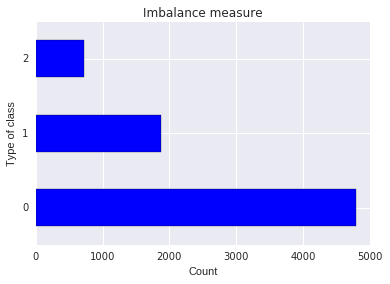

In [68]:
trainDF.fault_severity.value_counts().plot(kind='barh',title='Imbalance measure')
plt.ylabel('Type of class')
plt.xlabel('Count')

In [72]:
# Calculation location count for each class variable
pd.crosstab(trainDF.fault_severity,trainDF.location)

location,location 1,location 10,location 100,location 1000,location 1002,location 1005,location 1006,location 1007,location 1008,location 1009,...,location 987,location 989,location 99,location 990,location 991,location 994,location 995,location 996,location 998,location 999
fault_severity,,,,,,,,,,,,,,,,,,,,,
0,14,1,13,3,1,1,3,16,34,4,...,1,3,2,3,0,5,4,1,4,3
1,8,0,2,0,0,0,0,3,21,0,...,0,11,0,3,1,0,14,3,6,3
2,2,0,0,0,0,0,0,0,16,0,...,0,2,0,0,2,0,22,0,1,0


In [73]:
data.head()

,fault_severity,location,event_type_event_type 1,event_type_event_type 10,event_type_event_type 11,event_type_event_type 12,event_type_event_type 13,event_type_event_type 14,event_type_event_type 15,event_type_event_type 17,...,resource_type_resource_type 5,resource_type_resource_type 6,resource_type_resource_type 7,resource_type_resource_type 8,resource_type_resource_type 9,severity_type_severity_type 1,severity_type_severity_type 2,severity_type_severity_type 3,severity_type_severity_type 4,severity_type_severity_type 5
id,,,,,,,,,,,,,,,,,,,,,
14121,1,118,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9320,0,91,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
14394,1,152,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8218,1,931,0,0,1,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
14804,0,120,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


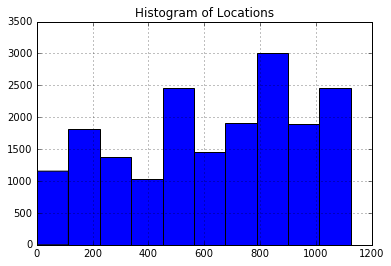

In [5]:
data.location.hist()
plt.title('Histogram of Locations')

In [6]:
loc0=data[data.fault_severity==0].location
loc1=data[data.fault_severity==1].location
loc2=data[data.fault_severity==2].location
testloc=data[data.fault_severity.isnull()].location


/home/sameer/anaconda2/lib/python2.7/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


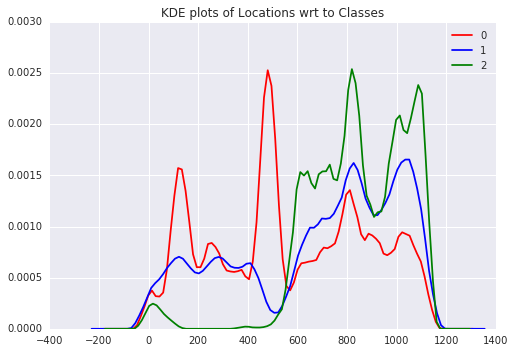

In [7]:
import seaborn as sns
N=max(max(set(loc0)),max(set(loc1)),max(set(loc2)),max(set(testloc)))
binsize = np.arange(0,N+1,1)
sns.kdeplot(loc0,label='0', kernel='tri', color='red')
sns.kdeplot(loc1, label='1', kernel='tri', color='blue')
sns.kdeplot(loc2, label='2',kernel='tri', color='green')
# sns.kdeplot(testloc, label='Test',kernel='tri', color='black')
plt.title('KDE plots of Locations wrt to Classes')

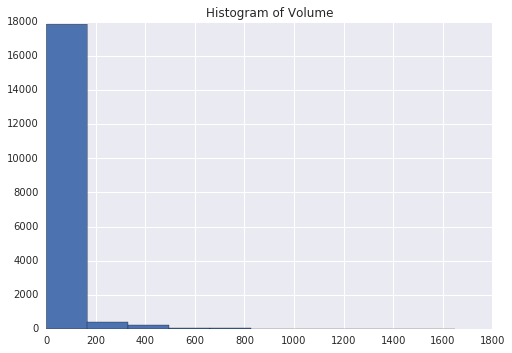

In [8]:
data.volume.hist()
plt.title('Histogram of Volume')

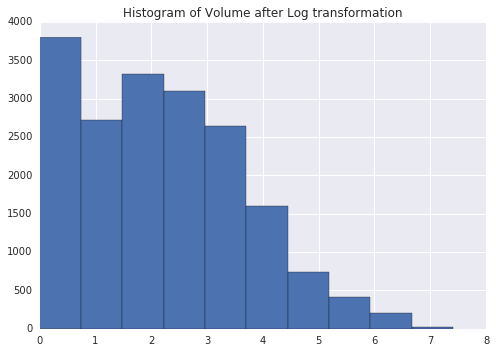

In [9]:
data.volume.apply(np.log).hist()
plt.title('Histogram of Volume after Log transformation')

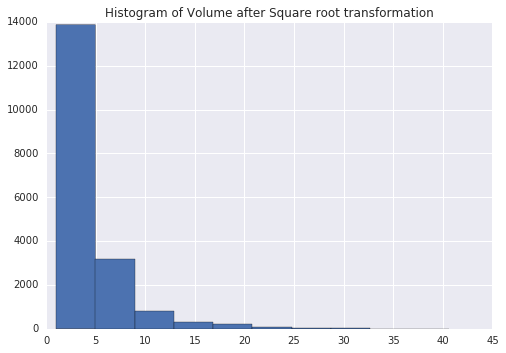

In [10]:
data.volume.apply(np.sqrt).hist()
plt.title('Histogram of Volume after Square root transformation')

In [11]:
vol0=data[data.fault_severity==0].volume
vol1=data[data.fault_severity==1].volume
vol2=data[data.fault_severity==2].volume
testvol=data[data.fault_severity.isnull()].volume

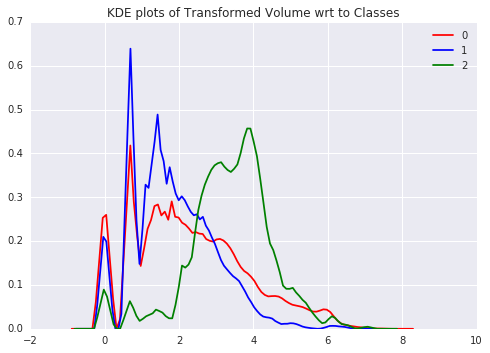

In [12]:
N=max(max(set(vol0)),max(set(vol1)),max(set(vol2)),max(set(testvol)))
binsize = np.arange(0,N+1,1)
sns.kdeplot(vol0.apply(lambda x: np.log(x)),kernel='tri', label='0', color='red')
sns.kdeplot(vol1.apply(lambda x: np.log(x)), kernel='tri', label='1', color='blue')
sns.kdeplot(vol2.apply(lambda x: np.log(x)), kernel='tri', label='2', color='green')
# sns.distplot(testvol, hist=False, label='Test', color='black')
plt.title('KDE plots of Transformed Volume wrt to Classes')

### We can see some pattern for class 2 which is the minority class this can help in distinguishing it from others

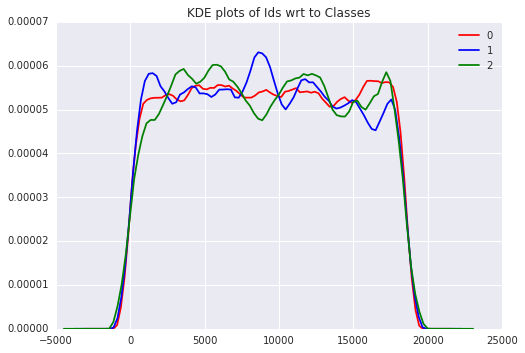

In [13]:
id0=data[data.fault_severity==0].index
id1=data[data.fault_severity==1].index
id2=data[data.fault_severity==2].index
testid=data[data.fault_severity.isnull()].index
N=max(max(set(id0)),max(set(id1)),max(set(id2)),max(set(testid)))
binsize = np.arange(0,N+1,1)
sns.kdeplot(id0, label='0', kernel='tri', color='red')
sns.kdeplot(id1, label='1',kernel='tri', color='blue')
sns.kdeplot(id2, label='2',kernel='tri', color='green')
# sns.kdeplot(testid, hist=False, label='Test', color='black')
plt.title('KDE plots of Ids wrt to Classes')

No significant difference with distribution of ID

## Checking for outliers

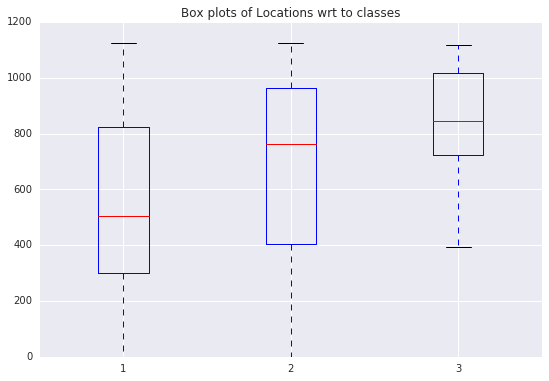

In [14]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
ax.boxplot([loc0,loc1,loc2])
plt.title('Box plots of Locations wrt to classes')

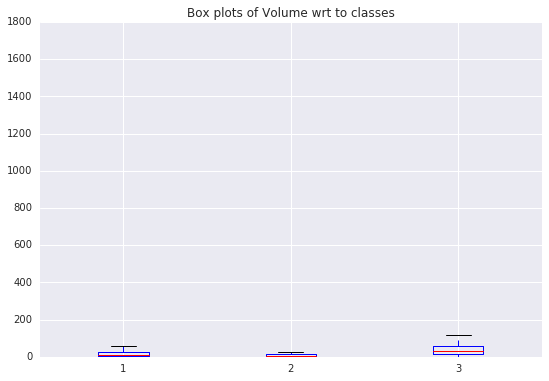

In [15]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
ax.boxplot([vol0,vol1,vol2])
plt.title('Box plots of Volume wrt to classes')

In [16]:
data.volume.head()

id
14121     38
9320     316
14394      2
8218      22
14804     12
Name: volume, dtype: int64

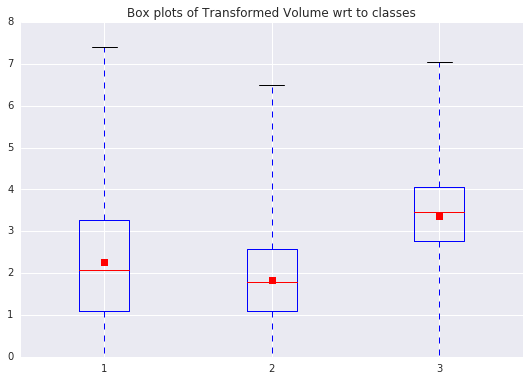

In [17]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)
ax.boxplot([vol0.apply(lambda x: np.log(x)),vol1.apply(lambda x: np.log(x)),vol2.apply(lambda x: np.log(x))],showmeans=True, whis=99)
plt.title('Box plots of Transformed Volume wrt to classes')

### Reducing to 3 dimensions and trying to view data using PCA

explained variance ratio: [ 0.30702826  0.10404642  0.06326756]


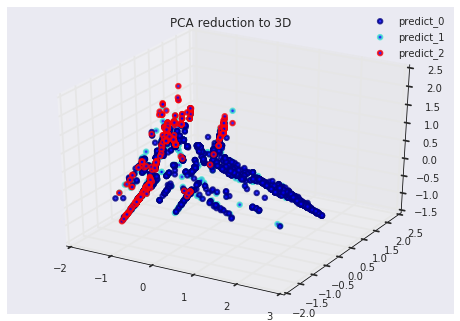

In [18]:
testDF=data[data.fault_severity.isnull()]
trainDF=data[data.fault_severity.notnull()]
X=trainDF
X=X.drop(['location','volume','fault_severity'],axis=1)
X=X.as_matrix()
Y=trainDF.fault_severity
Y=Y.as_matrix()

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
X_r = pca.fit(X).transform(X)

print('explained variance ratio: %s' % str(pca.explained_variance_ratio_))

fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')
lw = 2
target_names=['predict_0','predict_1','predict_2']

for color, i, target_name in zip(['navy', 'turquoise', 'red'], [0, 1, 2], target_names):
    ax.scatter(X_r[Y == i, 0], X_r[Y == i, 1], X_r[Y == i, 2], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA reduction to 3D')

In [20]:
X=trainDF
X=X.drop(['volume','fault_severity'],axis=1)
X=X.as_matrix()
Y=trainDF.fault_severity
Y=Y.as_matrix()
X_test=testDF
X_test=X_test.drop(['volume','fault_severity'],axis=1)
X_test=X_test.as_matrix()

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn import metrics
	
#Logistic regression classifier
clf=LogisticRegression(C=1e3, penalty='l2',max_iter=1000) #ll 0.608 c=1e3

clf.fit(X,Y)

#Performing CV with k=10
predicted = cross_validation.cross_val_predict(clf, X, Y, cv=10)
print "accuracy score: ", metrics.accuracy_score(Y, predicted)


accuracy score:  0.71914374746


In [65]:
print "classification_report: \n ", metrics.classification_report(Y, predicted)

classification_report: 
               precision    recall  f1-score   support

        0.0       0.81      0.87      0.84      4784
        1.0       0.56      0.36      0.43      1871
        2.0       0.45      0.64      0.53       726

avg / total       0.71      0.72      0.71      7381



In [63]:
Y_test=clf.predict_proba(X_test)
# create submission
submission = pd.DataFrame(Y_test,columns=['predict_0','predict_1','predict_2'])
submission.head()
submission['id']=testDF.index.values
cols=submission.columns.tolist()
cols=cols[-1:] + cols[:-1]
submission=submission[cols]
submission.to_csv(open('submission.csv','wt'),index=False)